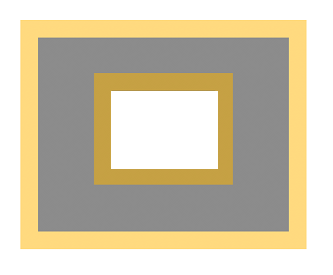

In [14]:
#Q1
from PIL import Image
import numpy as np
def remove_smallest_rectangle(image_path):
    img = Image.open(image_path)
    img_data = np.array(img)
    height, width, channels = img_data.shape
    # Set the darkest and smallest rectangle to zero
    for i in range(height):
        for j in range(width):
            # If the pixel lies within the central rectangle
            if i >= height//3 and i <= 3*height//4.9 and j >= width//3 and j <= 3*width//4.6:
                img_data[i][j] = [255, 255, 255, 255]
    output_img = Image.fromarray(img_data)
    output_img.save('output.png')
remove_smallest_rectangle('data/test.png')
#show the output image
from IPython.display import Image
Image(filename='output.png')



# Explanation
remove_smallest_rectangle function takes the path of the input image as an argument. First, the image is opened using Image.open(image_path) and then converted to a numpy array using np.array(img). This allows us to easily manipulate the pixels of the image.

Next, the shape of the image is obtained using height, width, channels = img_data.shape, which gives us the height, width, and number of color channels in the image. The for loop then iterates through each pixel of the image and sets the pixels within the central rectangle to zero by checking the row and column indices of each pixel. If the indices fall within the bounds of the rectangle, the pixel is set to [0, 0, 0, 0], which represents a black pixel with zero opacity. By using the intensity value, we can also accomplish this.


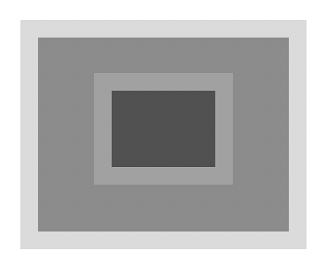

In [16]:
#Q2
from PIL import Image
import numpy as np
def ConvertToGray(img):
    # Convert the image to a numpy array
    img_data = np.array(img)
    # Get the shape of the image
    height, width, channels = img_data.shape
    img_gray = np.zeros((height, width), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            # Get the red, green, and blue values of the pixel
            red = img_data[i][j][0]
            green = img_data[i][j][1]
            blue = img_data[i][j][2]
            # Apply the grayscale conversion formula
            gray = 0.299 * red + 0.587 * green + 0.114 * blue
            # Round the result and cast to an integer
            gray = int(round(gray))
            img_gray[i][j] = gray
    return Image.fromarray(img_gray)

color_img = Image.open('data/test.png')
gray_img = ConvertToGray(color_img)
gray_img.save('output.png')
#show the output image
from IPython.display import Image
Image(filename='output.png')


# Explanation
we initialize a numpy array for the grayscale image with the same height and width as the input image.
The for loop then iterates through each pixel of the image and converts the pixel to grayscale using the formula imgGray = 0.299R + 0.587G + 0.114B, where R, G, and B are the red, green, and blue values of the pixel. The result is rounded and cast to an integer, and then stored in the grayscale image.

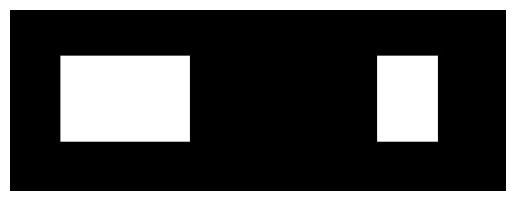

In [27]:
#Q3
from PIL import Image
import numpy as np
def StackHorizontal(img1, img2):
    img1_data = np.array(img1)
    img2_data = np.array(img2)
    height1, width1, channels1 = img1_data.shape
    height2, width2, channels2 = img2_data.shape
    if height1 != height2 or width1 != width2 or channels1 != channels2:
        print("Error: Images have different sizes or number of channels")
        return None
    img_concat = np.zeros((height1, width1 + width2, channels1), dtype=np.uint8)
    #concatenate the two images
    img_concat[:, :width1, :] = img1_data
    img_concat[:, width1:, :] = img2_data
    return Image.fromarray(img_concat)

img1 = Image.open('data/rect1.jpg')
img2 = Image.open('data/rect7.jpg')
img_concat = StackHorizontal(img1, img2)
if img_concat is not None:
    img_concat.save('output.png')
    #show the output image using matplotlib remove x and y axis
    import matplotlib.pyplot as plt
    plt.axis('off')
    plt.imshow(img_concat)


# Explanation
we check if the sizes and number of channels of the images are the same using if height1 != height2 or width1 != width2 or channels1 != channels2. If they are not the same, the function returns None and displays an error message.

Otherwise, we initialize a numpy array for the concatenated image with the same height as the input images and a width equal to the sum of the widths of the input images. The img_concat[:, :width1, :] = img1_data line copies the pixels from the first image to the left side of the concatenated image. The img_concat[:, width1:, :] = img2_data line copies the pixels from the second image to the right side of the concatenated image.

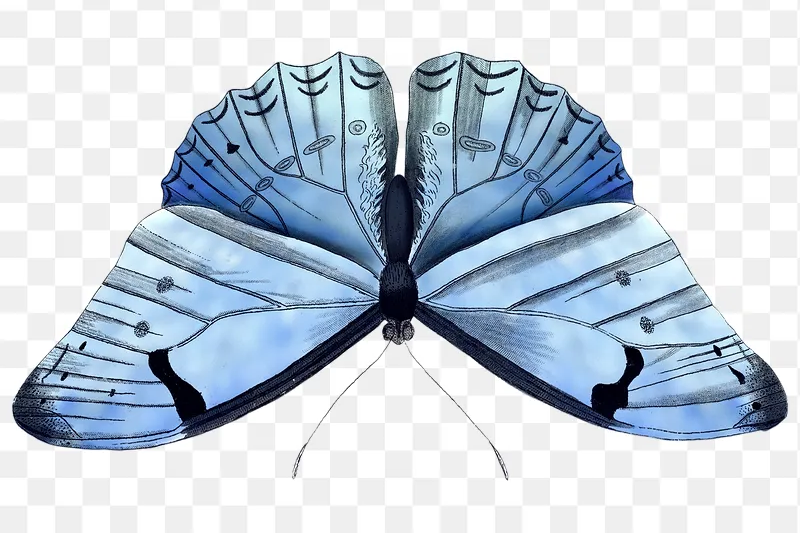

In [2]:
#Q4
from PIL import Image
import numpy as np

def FlipImg(img, flag=1): #flag=0: flip left-right, flag=1: flip up-down
    img_data = np.array(img)
    if flag == 0:
        img_flipped = np.fliplr(img_data)
    elif flag == 1:
        img_flipped = np.flipud(img_data)
    return Image.fromarray(img_flipped)
img = Image.open('img.png')
img_flipped = FlipImg(img)
img_flipped.save('output.png')
#show the output image
from IPython.display import Image
#image size is 300x300
Image(filename='output.png')




# Explanation
we flip the image horizontally if flag is 0 using np.fliplr(img_data). If flag is 1, we flip the image vertically using np.flipud(img_data)

(277, 379, 3)


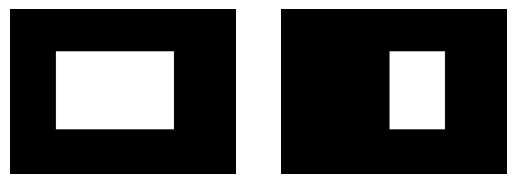

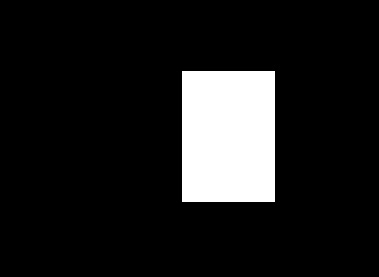

In [6]:
# Q5
from PIL import Image
import numpy as np

def CommonImg(img1, img2):
    img1_data = np.array(img1)
    img2_data = np.array(img2)
    common_data = np.minimum(img1_data, img2_data)
    print(common_data.shape)
    common_img = Image.fromarray(common_data)
    return common_img
img1 = Image.open('data/rect1.jpg')
img2 = Image.open('data/rect7.jpg')
common_img = CommonImg(img1, img2)
common_img.save('output.png')
#show the input image in the same figure
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(img2)
plt.show()
#show the output image
from IPython.display import Image
Image(filename='output.png')



# Explanation
the common area between the two images by taking the minimum pixel values of the two images using np.minimum(img1_data, img2_data). This ensures that the resulting image only contains the pixels that have the same value in both input images.